<a href="https://colab.research.google.com/github/tozanni/Data_Science_Notebooks/blob/main/CIFAR10_CNN_SinSolucion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Práctica de redes convolucionales (Acción 1)

In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras import datasets, layers, models
from keras.utils import np_utils
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_images, train_labels0), (test_images, test_labels0) = datasets.cifar10.load_data()


170508288/170498071 [==============================] - 14s 0us/step


Verificando la cantidad de imagenes en el dataset y su dimension, en este caso recibimos 50,000 imagenes de 32x32 x 3 canales de color.


In [ ]:
print(train_images.shape)
print(train_labels0.shape)
print(test_images.shape)
print(test_labels0.shape)

Visualiza el formato original de los labels como enteros, este valor es necesario convertirlo a one-hot para poder aplicar una función de pérdida


In [3]:
# Creating a list of all the class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
# Visualizamos 25 imagenes del dataset en un grid de 5x5
plt.figure(figsize=[10,10])
for i in range (25):    
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels0[i][0]])
plt.show()

In [5]:
# Convertimos los pixeles a tipo float
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
 
# Normalización, dividiendo el valor de todos los pixeles por 255, ya que es el valor máximo de intensidad de cada pixel.
# El objetivo es que el valor de todos los pixeles este entre 0 y 1
train_images = train_images / 255
test_images = test_images / 255 

# Se codifican las etiquetas como one-hot, posteriormente se utilizará la función de categorical-cross-entropy
num_classes = 10
train_labels = np_utils.to_categorical(train_labels0, num_classes)
test_labels = np_utils.to_categorical(test_labels0, num_classes)


#### Ejercicio 1:

¿Cuál de las siguientes opciones es idónea como última capa de tu modelo?  

Escribe tu respuesta en el espacio indicado en la siguiente celda.

A:
```
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
```

B:
```
model.add(layers.Dense(10, activation='relu'))
```

C:
```
model.add(layers.Dense(32, activation='softmax'))
```

D:
```
model.add(layers.Dense(10, activation='softmax'))
```


In [ ]:
model = Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

## Ejercicio 1:
# Inserta en la siguiente línea la opción que consideres correcta.
# model.add(...)


model.summary()

### Entrenamiento del modelo

In [ ]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

### Ejercicio 2:

Modifica la siguiente línea para entrenar el modelo por 20 épocas.

In [ ]:
history = model.fit(train_images, train_labels, batch_size=64, epochs=1, validation_data=(test_images, test_labels))

### Visualización del proceso de entrenamiento. 

Aquí puedes ver si el entrenamiento está disminuyendo la pérdida o no. En cuyo caso puedes decidir aplicar técnicas para optimizar el mismo como EarlyStopping o LR find.

Text(0.5, 1.0, 'Loss Curves')

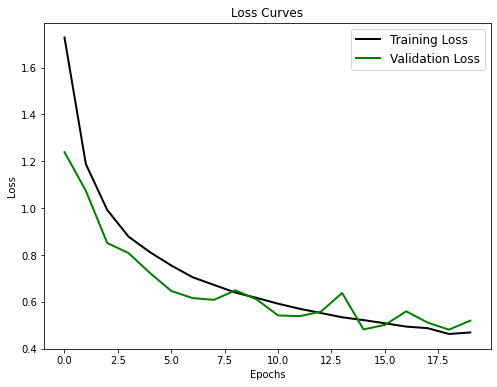

In [ ]:
# Loss curve
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=12)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Del mismo modo puedes observar la calidad de la predicción en el conjunto de test. Conforme avanzan las épocas, la exactitud de la predicción (Accuracy) se va incrementando. ¿Te parece que más épocas ayudarían al modelo?

Text(0.5, 1.0, 'Accuracy Curves')

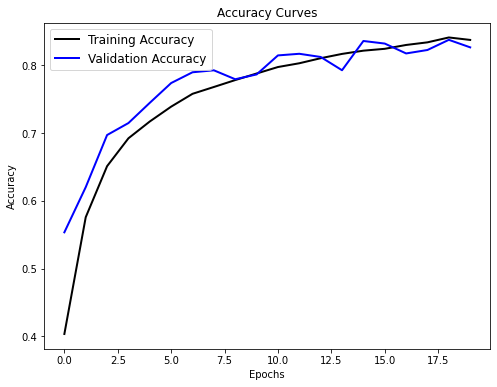

In [ ]:
# Curva de exactitud (accuracy)
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=12)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [ ]:
# Making the Predictions
pred = model.predict(test_images)
print(pred)

# Converting the predictions into label index 
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)


[[9.70473684e-06 4.34030972e-06 4.23148624e-04 ... 8.55978669e-06
  2.02514420e-05 2.02402725e-06]
 [2.82931637e-06 3.08675342e-04 2.71743628e-10 ... 1.70694930e-10
  9.99686360e-01 2.18615105e-06]
 [1.33194644e-05 1.97860918e-05 2.97679463e-07 ... 7.81762566e-08
  9.99959826e-01 5.59002183e-06]
 ...
 [3.69087658e-08 9.80118031e-08 2.04106007e-04 ... 2.80380245e-05
  7.46726059e-08 5.64839020e-08]
 [7.91223068e-03 9.87039745e-01 1.31781300e-04 ... 1.02371756e-04
  3.83512583e-04 2.18495238e-03]
 [2.59904709e-07 4.25272447e-06 7.51805010e-06 ... 9.98488307e-01
  7.13591675e-08 2.62723205e-07]]
[3 8 8 ... 5 1 7]


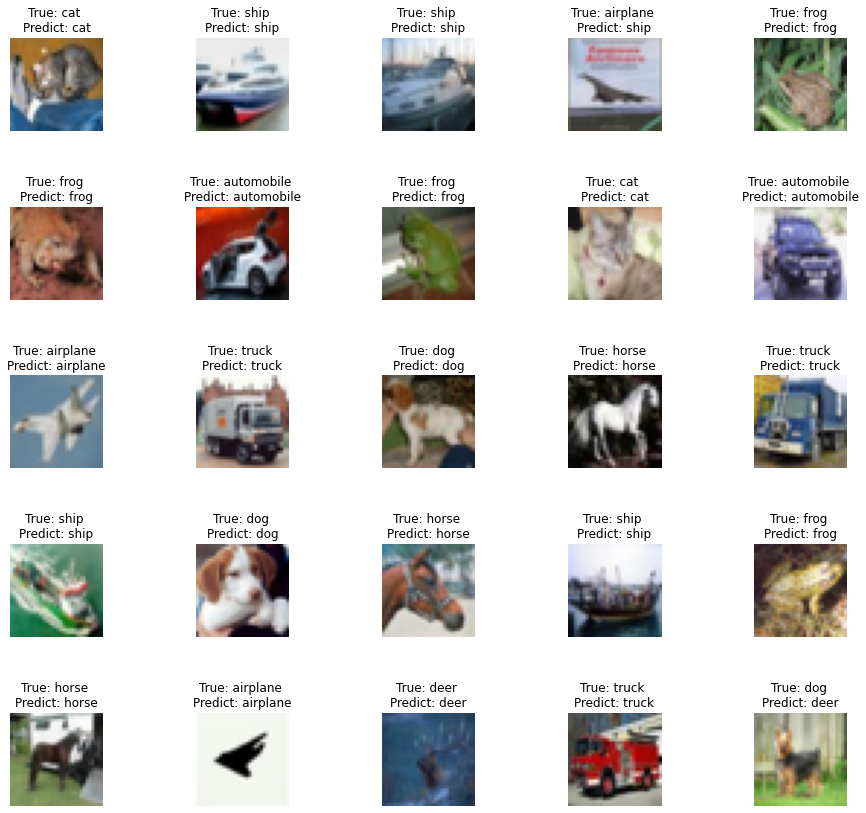

In [ ]:
# Plotting the Actual vs. Predicted results

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

## Generación de matriz de confusión

### Ejercicio

Ajusta el siguiente código para obtener la matriz de confusión del modelo original.

In [ ]:
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

#cm=confusion_matrix(test_labels.argmax(axis=1), pred.argmax(axis=1))
#print("Classification Report:\n")
#cr=classification_report(test_labels.argmax(axis=1), pred.argmax(axis=1), target_names=class_names)

Referencia: 

https://www.kaggle.com/code/ektasharma/simple-cifar10-cnn-keras-code-with-88-accuracy/notebook

